In [5]:
import pandas as pd

In [6]:
caminho_2019 = "../dados/obitos-2019.csv"
caminho_2020 = "../dados/obitos-2020.csv"

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2020.shape}")

2019 (12339, 6)
2020 (14666, 6)


In [7]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,8
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,56
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [7]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
4446,MG,INDETERMINADA,DOMICILIO,40 - 49,M,64
4731,PE,INSUFICIENCIA_RESPIRATORIA,OUTRO,40 - 49,M,1
9026,MG,INDETERMINADA,OUTRO,70 - 79,M,9
10350,CE,PNEUMONIA,IGNORADO,80 - 89,M,126
6626,SE,PNEUMONIA,DOMICILIO,50 - 59,F,1


In [8]:
total_obitos_2019 = dados_2019.groupby("tipo_doenca").sum()
total_obitos_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,6977
INSUFICIENCIA_RESPIRATORIA,100361
OUTRAS,658891
PNEUMONIA,225933
SEPTICEMIA,175104
SRAG,1497


In [9]:
total_obitos_2020 = dados_2020.groupby("tipo_doenca").sum()
total_obitos_2020

,total
tipo_doenca,
COVID,177299
INDETERMINADA,9063
INSUFICIENCIA_RESPIRATORIA,93304
OUTRAS,647807
PNEUMONIA,171938
SEPTICEMIA,153033
SRAG,15715


In [10]:
dados_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12339 entries, 0 to 12338
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            12339 non-null  object
 1   tipo_doenca   12339 non-null  object
 2   local_obito   12339 non-null  object
 3   faixa_etaria  12339 non-null  object
 4   sexo          12337 non-null  object
 5   total         12339 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 578.5+ KB


In [11]:
proporcao = total_obitos_2020/total_obitos_2019
proporcao

,total
tipo_doenca,
COVID,177299.000000
INDETERMINADA,1.298982
INSUFICIENCIA_RESPIRATORIA,0.929684
OUTRAS,0.983178
PNEUMONIA,0.761013
SEPTICEMIA,0.873955
SRAG,10.497662


In [12]:
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt

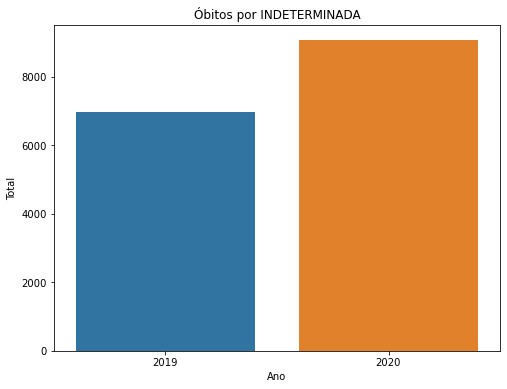

In [14]:
def grafico_comparativo(causa):

    total_2019 = dados_2019.groupby("tipo_doenca").sum()
    total_2020 = dados_2020.groupby("tipo_doenca").sum()
    lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    dados = pd.DataFrame({"Total": lista,
                          "Ano": [2019, 2020]})

    plt.figure(figsize=(8,6))
    sns.barplot(x = "Ano", y = "Total", data = dados)
    plt.title(f"Óbitos por {causa}")
    plt.show()
   

grafico_comparativo("INDETERMINADA")